In [1]:
import pandas as pd 
#stock price data of Apple for a duration of 1 year
#would do the same thing for other stocks of 2 years.
df=pd.read_csv("/Users/joonghochoi/Desktop/apple.csv")
df[:10]

,date,close,volume,open,high,low
0,16:00,192.23,"46,541,444",191.72,197.18,191.4501
1,2018/11/13,192.23,46725710.0000,191.63,197.18,191.4501
2,2018/11/12,194.17,50991030.0000,199.00,199.85,193.7900
3,2018/11/09,204.47,34317760.0000,205.55,206.01,202.2500
4,2018/11/08,208.49,25289270.0000,209.98,210.12,206.7500
5,2018/11/07,209.95,33291640.0000,205.97,210.06,204.1300
6,2018/11/06,203.77,31774720.0000,201.92,204.72,201.6900
7,2018/11/05,201.59,66072170.0000,204.30,204.39,198.1700
8,2018/11/02,207.48,91046560.0000,209.55,213.65,205.4300
9,2018/11/01,222.22,52954070.0000,219.05,222.36,216.8100


In [2]:
# By default the "date" column was in string format,
# we need to convert it into date-time format
  
# parse_dates =["date"], converts the "date" 
# column to date-time format. We know that 
# resampling works with time-series data only
# so convert "date" column to index
df = pd.read_csv("apple.csv", parse_dates =["date"], index_col ="date")
df.head(10)


,close,volume,open,high,low
date,,,,,
2021-08-10 16:00:00,192.23,"46,541,444",191.72,197.18,191.4501
2018-11-13 00:00:00,192.23,46725710.0000,191.63,197.18,191.4501
2018-11-12 00:00:00,194.17,50991030.0000,199.00,199.85,193.7900
2018-11-09 00:00:00,204.47,34317760.0000,205.55,206.01,202.2500
2018-11-08 00:00:00,208.49,25289270.0000,209.98,210.12,206.7500
2018-11-07 00:00:00,209.95,33291640.0000,205.97,210.06,204.1300
2018-11-06 00:00:00,203.77,31774720.0000,201.92,204.72,201.6900
2018-11-05 00:00:00,201.59,66072170.0000,204.30,204.39,198.1700
2018-11-02 00:00:00,207.48,91046560.0000,209.55,213.65,205.4300


In [3]:
#df=df[1:] meant to be between 2017 to 2018, so I should
#drop 2021 data but insufficient data. So just keep it. 
#df.head(10)

In [4]:
df.shape

(254, 5)

# Basic EDA

In [5]:
monthly_resampled_data = df.close.resample('M').mean()
monthly_resampled_data

date
2017-11-30    172.090769
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    167.638947
2018-03-31    174.496190
2018-04-30    169.834286
2018-05-31    185.536818
2018-06-30    188.621429
2018-07-31    190.311429
2018-08-31    213.346087
2018-09-30    222.073684
2018-10-31    220.845652
2018-11-30    204.930000
2018-12-31           NaN
2019-01-31           NaN
2019-02-28           NaN
2019-03-31           NaN
2019-04-30           NaN
2019-05-31           NaN
2019-06-30           NaN
2019-07-31           NaN
2019-08-31           NaN
2019-09-30           NaN
2019-10-31           NaN
2019-11-30           NaN
2019-12-31           NaN
2020-01-31           NaN
2020-02-29           NaN
2020-03-31           NaN
2020-04-30           NaN
2020-05-31           NaN
2020-06-30           NaN
2020-07-31           NaN
2020-08-31           NaN
2020-09-30           NaN
2020-10-31           NaN
2020-11-30           NaN
2020-12-31           NaN
2021-01-31           NaN
2021-02-28          

In [6]:
# find the mean opening price of each week 
# for each week over a period of 1 year.
weekly_resampled_data = df.open.resample('W').mean()
weekly_resampled_data


date
2017-11-19    171.7460
2017-11-26    172.3825
2017-12-03    172.4720
2017-12-10    169.7120
2017-12-17    171.9760
                ...   
2021-07-18         NaN
2021-07-25         NaN
2021-08-01         NaN
2021-08-08         NaN
2021-08-15    191.7200
Freq: W-SUN, Name: open, Length: 196, dtype: float64

In [7]:
# how much missing data?
len(df.isnull())

254

In [8]:
# often, ts methods/libs don't play nicely with missing data/NaNs, so
#  fill missing values (recall pd timeseries methods from Part 1!)
df1 = (df
          .resample('W')
          .mean()
          .interpolate('linear')
         )   
df1.head(20)

,close,open,high,low
date,,,,
2017-11-19,171.1280,171.74600,172.31194,170.580000
2017-11-26,173.2625,172.38250,173.69000,172.008975
2017-12-03,171.9080,172.47200,173.33600,169.860000
2017-12-10,169.4280,169.71200,171.15694,168.444000
2017-12-17,172.5660,171.97600,173.22400,171.272200
2017-12-24,175.0660,174.72600,175.89080,174.160000
2017-12-31,170.3700,170.60500,171.17250,169.772250
2018-01-07,173.1300,172.16750,173.92250,171.587500
2018-01-14,175.0680,174.56600,175.56372,174.096000


In [9]:
df1.shape

(196, 4)

In [10]:
"""
The additive model is useful when the seasonal variation is relatively 
constant over time. The multiplicative model is useful when the seasonal variation 
increases over time.

Thus, I chose multiplicative
"""

'\nThe additive model is useful when the seasonal variation is relatively \nconstant over time. The multiplicative model is useful when the seasonal variation \nincreases over time.\n\nThus, I chose multiplicative\n'

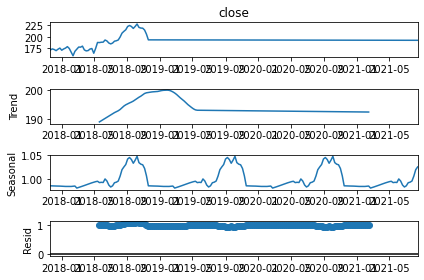

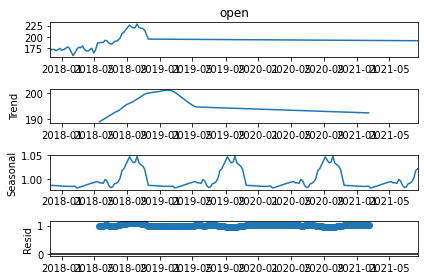

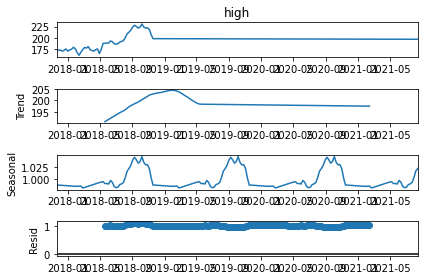

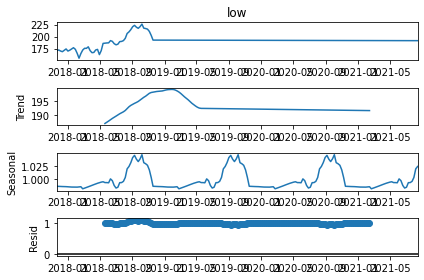

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

for col in df1:
    seas_decomp = seasonal_decompose(df1[col],model="multiplicative")
    #I would choose the price column for Arthur's challenge. 
    fig=seas_decomp.plot()

In [12]:
"""
Code above would work for two years data

Figure highlights the goal: take the observed data (top), 
identify the overall trend (a low-variance version of the observations, 
second chart), and identify the periodic component (called "seasonal," 
regardless of its frequency). Then, whatever is left after subtracting these 
from the observed data is the residual (bottom chart).

"""

'\nCode above would work for two years data\n\nFigure highlights the goal: take the observed data (top), \nidentify the overall trend (a low-variance version of the observations, \nsecond chart), and identify the periodic component (called "seasonal," \nregardless of its frequency). Then, whatever is left after subtracting these \nfrom the observed data is the residual (bottom chart).\n\n'

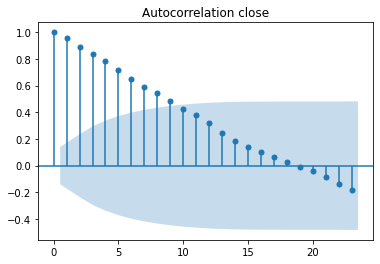

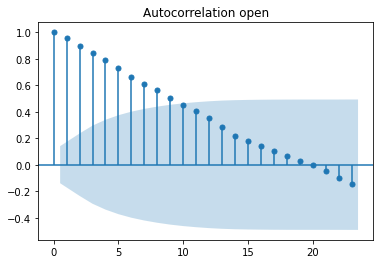

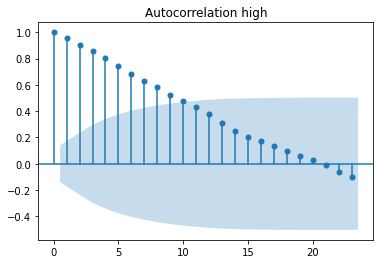

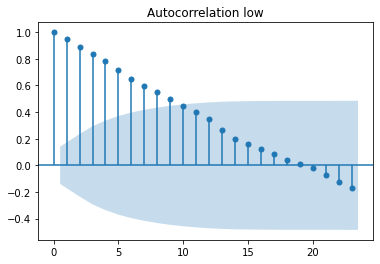

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

for col in df1:
    # Perform time series decompositon
    plot_acf(df1[col], title = "Autocorrelation " + col)

In [14]:
"""
Autocorrelation represents the degree of similarity between a given time series
and a lagged version of itself over successive time intervals. 
Autocorrelation measures the relationship between a variable's current value 
and its past values.

If autocorrelation values are close to 0, then values between consecutive observations
are not correlated with one another. Inversely, autocorrelations values close to 1 
or -1 indicate that there exists strong positive or negative correlations between 
consecutive observations, respectively.

plot_acf() function also returns confidence intervals 
(represented as blue shaded regions). 
If an autocorrelation value goes beyond the confidence interval region, 
you can assume that the observed autocorrelation value is statistically significant.

"""

"\nAutocorrelation represents the degree of similarity between a given time series\nand a lagged version of itself over successive time intervals. \nAutocorrelation measures the relationship between a variable's current value \nand its past values.\n\nIf autocorrelation values are close to 0, then values between consecutive observations\nare not correlated with one another. Inversely, autocorrelations values close to 1 \nor -1 indicate that there exists strong positive or negative correlations between \nconsecutive observations, respectively.\n\nplot_acf() function also returns confidence intervals \n(represented as blue shaded regions). \nIf an autocorrelation value goes beyond the confidence interval region, \nyou can assume that the observed autocorrelation value is statistically significant.\n\n"

In [15]:
"""
Finding: As the lag between interval increases, less correlated. Also, not statistically
significant.
"""

'\nFinding: As the lag between interval increases, less correlated. Also, not statistically\nsignificant.\n'

<AxesSubplot:>

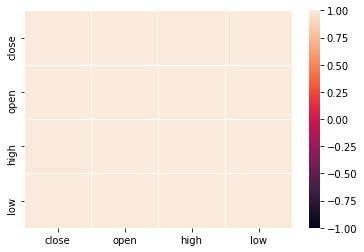

In [16]:
import seaborn as sns

sns.heatmap(df1.corr(),vmin= -1,vmax = 1,  linewidths = .5)



# Prediction

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


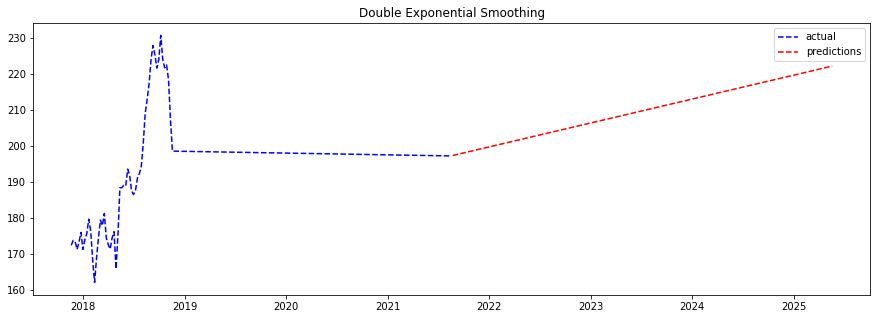

In [17]:
from statsmodels.tsa.api import Holt
from matplotlib import pyplot as plt


double = Holt(df1['high']).fit(optimized=True)
double_preds = double.forecast(df1['high'].shape[0])
#for double_preds, need to replace df1 with df2, which has the 

fig, ax = plt.subplots(figsize=(15,5))
ax = plt.plot(df1['high'], 'b--', label="actual")
ax = plt.plot(double_preds.index, double_preds, 'r--', label="predictions")
ax = plt.legend(loc='upper right')
ax = plt.title("Double Exponential Smoothing")

In [18]:
double.forecast(df1['high'].shape[0])

2021-08-22    197.307527
2021-08-29    197.435055
2021-09-05    197.562582
2021-09-12    197.690110
2021-09-19    197.817637
                 ...    
2025-04-20    221.665262
2025-04-27    221.792789
2025-05-04    221.920317
2025-05-11    222.047844
2025-05-18    222.175372
Freq: W-SUN, Length: 196, dtype: float64

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


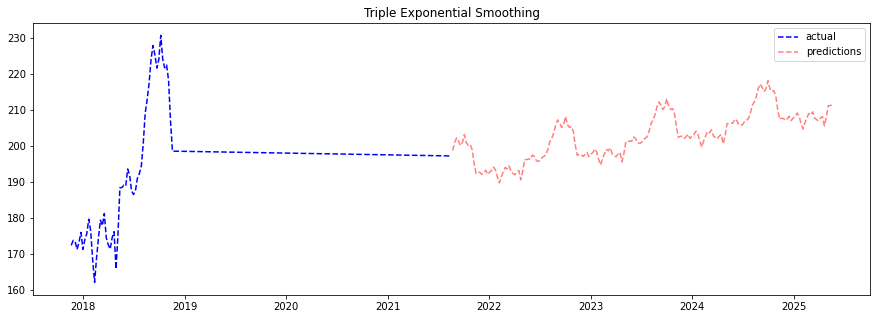

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(df1['high'],
                              trend="additive",
                              seasonal="additive").fit(optimized=True)
triple_preds = triple.forecast(df1['high'].shape[0])

fig, ax = plt.subplots(figsize=(15,5))
ax = plt.plot(df1['high'], 'b--', label="actual")
ax = plt.plot(triple_preds.index, triple_preds, 'r--', label="predictions", alpha = 0.5)
ax = plt.legend(loc='upper right')
ax = plt.title("Triple Exponential Smoothing")

In [20]:
triple_preds = triple.forecast(df1['high'].shape[0])
triple_preds


2021-08-22    198.684483
2021-08-29    200.892601
2021-09-05    202.190243
2021-09-12    201.308974
2021-09-19    200.084155
                 ...    
2025-04-20    205.548731
2025-04-27    207.902784
2025-05-04    211.183268
2025-05-11    211.178792
2025-05-18    211.339555
Freq: W-SUN, Length: 196, dtype: float64

In [ ]:
"""
what data would I add? 
Me: competitors' data? similar data from similar company in the past
Arthur:some average of all the stocks

what data would I omit? outlier. extreme spikes then replace with linear trend
comfortable with algorithms
Ex. omit covid data

one single solution for take away project
otherwise great. Cuz talked through everything and explained well and justified.
---

One area of interest. Personal project. solve problem 
Embedding in volleyball, sports?

Ingredient to add to a recipe through embedding

single best thing to do for github, experience with ML. 
Host your ML on google cloud, flask
MLOps 

https://littlebigscience.com/cochlearnucleus

---
velocity vector would help.
Past and initial position. 
"""